<a href="https://colab.research.google.com/github/Kathyayani15/DataAnalysisWithPython/blob/main/Page_View_Time__Series_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

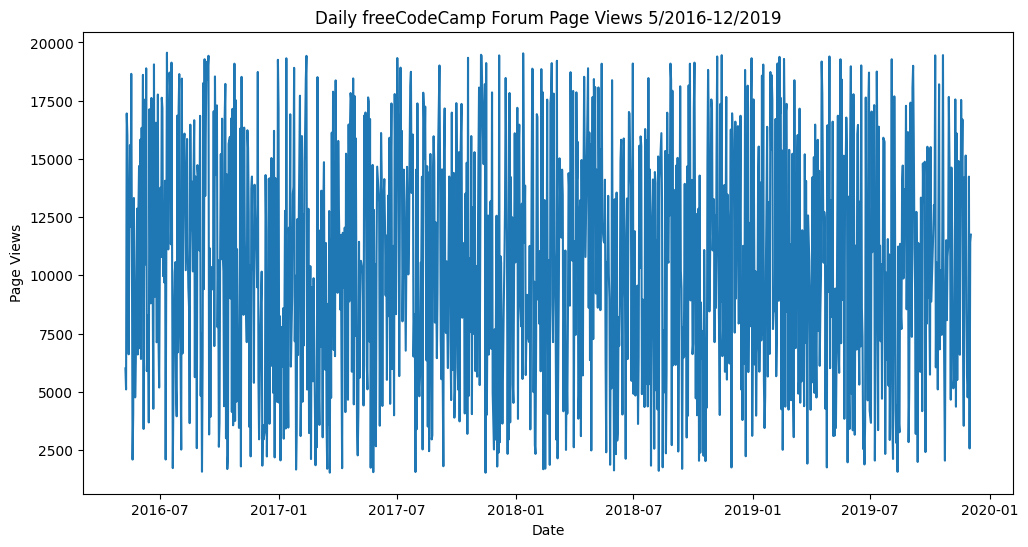

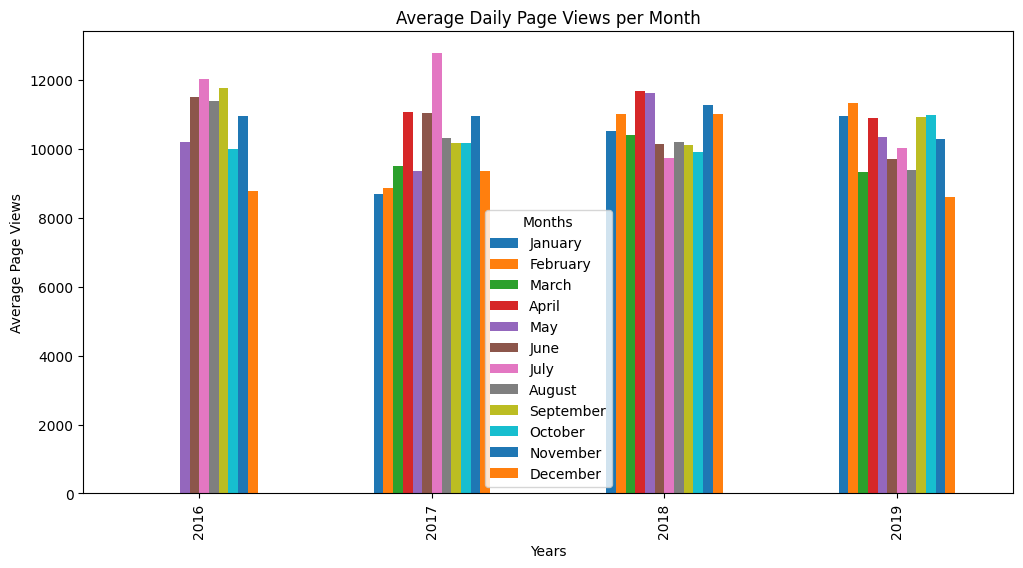

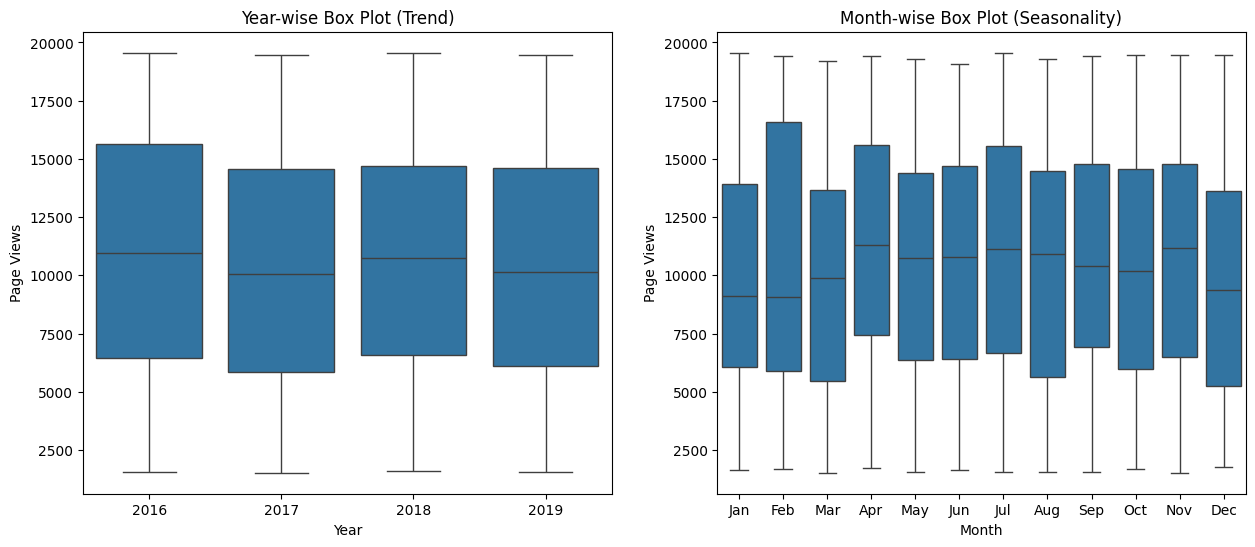

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a sample dataset
date_range = pd.date_range(start='2016-05-09', end='2019-12-03', freq='D')
page_views = pd.Series(np.random.randint(1000, 20000, size=len(date_range)), index=date_range)

# Create the dataframe
df = pd.DataFrame({'date': date_range, 'value': page_views.values})
df.set_index('date', inplace=True)

# Clean data by filtering out the top 2.5% and bottom 2.5% of the page views
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

def draw_line_plot():
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(df.index, df['value'], color='tab:blue')
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    fig.savefig('line_plot.png')
    return fig

# Prepare data for bar plot
df_bar = df.copy()
df_bar['year'] = df_bar.index.year
df_bar['month'] = df_bar.index.month
df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack()

def draw_bar_plot():
    fig = df_bar.plot(kind='bar', figsize=(12, 6)).figure
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.legend(title='Months', labels=[
        'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'
    ])
    plt.title('Average Daily Page Views per Month')
    fig.savefig('bar_plot.png')
    return fig

# Prepare data for box plots
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = df_box['date'].dt.year
df_box['month'] = df_box['date'].dt.strftime('%b')
df_box['month_num'] = df_box['date'].dt.month
df_box = df_box.sort_values('month_num')

def draw_box_plot():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    sns.boxplot(x='year', y='value', data=df_box, ax=ax1)
    ax1.set_title('Year-wise Box Plot (Trend)')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Page Views')

    sns.boxplot(x='month', y='value', data=df_box, ax=ax2, order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax2.set_title('Month-wise Box Plot (Seasonality)')
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Page Views')

    fig.savefig('box_plot.png')
    return fig

# Execute the functions to generate the plots
line_plot = draw_line_plot()
bar_plot = draw_bar_plot()
box_plot = draw_box_plot()

# Display the plots
line_plot.show()
bar_plot.show()
box_plot.show()
